In [1]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sympy import symbols, Eq, solve
from sympy import Matrix
import scipy as sp

# Load the .mat file.
mat_contents=sio.loadmat('./Kohonen_asNgrows_Sept15.mat')

In [2]:
alpha_e = mat_contents['alpha_e'].squeeze()
beta = mat_contents['beta'].squeeze()
c = mat_contents['c'].squeeze()
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eta_ee_kohonen = mat_contents['eta_ee_kohonen']
eRateT = mat_contents['eRateT']
iRateT = mat_contents['iRateT']
Jm = mat_contents['Jm']
Jmax_ei = mat_contents['Jmax_ei']
Jxm = mat_contents['Jxm']
mCee = mat_contents['mCee']
mCei = mat_contents['mCei']
mCii = mat_contents['mCii']
mean_E_current = mat_contents['mean_E_current']
mean_I_current = mat_contents['mean_I_current']
mean_X_current = mat_contents['mean_X_current']
mean_Jee_recorded = mat_contents['mean_Jee_recorded']
mRee = mat_contents['mRee']
mRei = mat_contents['mRei']
mRii = mat_contents['mRii']
mVee = mat_contents['mVee']
mVii = mat_contents['mVii']
N_vector = mat_contents['N_vector'].squeeze()
nBinsRecord = mat_contents['nBinsRecord']
Ntrec = mat_contents['Ntrec']
num_network_sizes = mat_contents['num_network_sizes']
num_realizations = mat_contents['num_realizations']
P = mat_contents['P']
Px = mat_contents['Px']
Q = mat_contents['Q']
Qf = mat_contents['Qf']
reMean = mat_contents['reMean']
riMean = mat_contents['riMean']
rx = mat_contents['rx'].squeeze()
seed = mat_contents['seed'].squeeze()
spikeIndex_E = mat_contents['spikeIndex_E']
spikeIndex_I = mat_contents['spikeIndex_I']
spikeTimes_E = mat_contents['spikeTimes_E']
spikeTimes_I = mat_contents['spikeTimes_I']
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
Tburn = mat_contents['Tburn']
Tburn_raster = mat_contents['Tburn_raster']
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']

# time_axis = np.linspace(0,T/1000,len(mean_Jee_recorded[0,:]))

/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


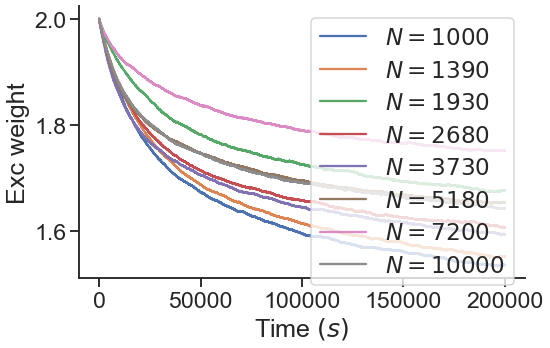

In [16]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

for i in range(len(mean_Jee_recorded[:,0])):
    plt.plot(mean_Jee_recorded[i,4].squeeze(),label="$N=%.0f$" %N_vector[i])
    
# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='k')

plt.legend()


plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

# plt.yticks((-250,-150,-50))
# plt.xticks((0,T/1000/2,T/1000))

# plt.xlim((-20,T/1000+20))
# plt.ylim((-251,-49))

# plt.xlim((1000,2000))
# plt.ylim((-180,-50))

sns.despine()
plt.show()

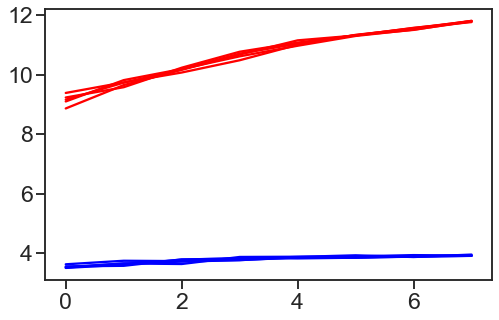

In [42]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(reMean*1000,color='blue')

plt.plot(riMean*1000,color='red')

plt.show()


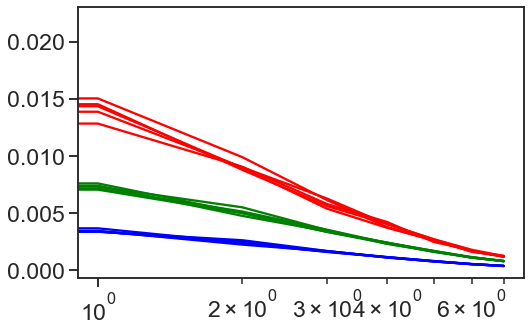

In [41]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(mCee,color='blue')

plt.plot(mCei,color='green')

plt.plot(mCii,color='red')

plt.xscale('log')

plt.show()


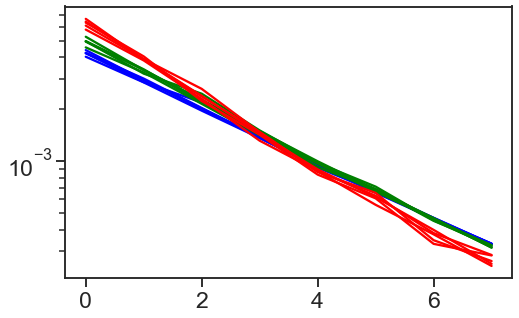

In [40]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(mRee,color='blue')

plt.plot(mRei,color='green')

plt.plot(mRii,color='red')

plt.yscale('log')

plt.show()


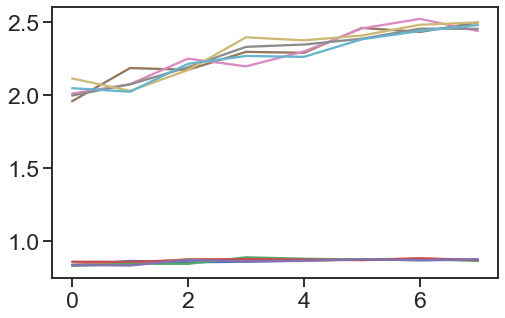

In [38]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(mVee)

plt.plot(mVii)

plt.show()


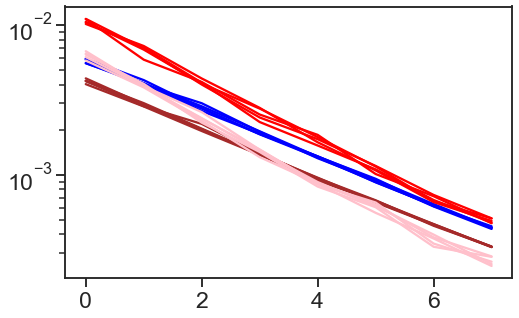

In [36]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(mCee/mVee,color='blue')

plt.plot(mCii/mVii,color='red')

plt.plot(mRee, color = 'brown')

plt.plot(mRii, color = 'pink')

plt.yscale('log')

plt.show()

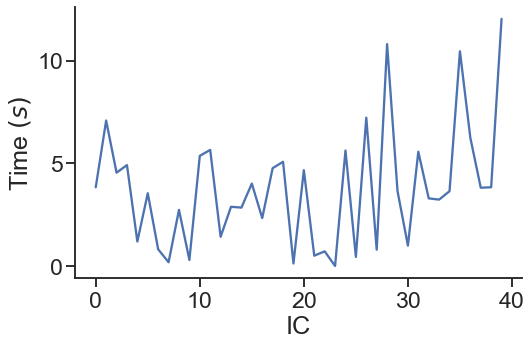

In [195]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

time_index = np.zeros((len(mean_Jei_recorded[:,0]),1))
deltaT = 10 / 1000 # sec
tol = 10e-12
window_size = 100000 # len(mean_Jei_recorded[0,:])
window_conv = np.ones((1,window_size)) / window_size
window_conv = window_conv.squeeze()

for i in range(len(mean_Jei_recorded[:,0])): # For each IC
    j=0
    a = np.convolve(np.diff(mean_Jei_recorded[i,:]),window_conv,mode='same')
    while(np.abs(a[j+1] - a[j]) > tol):
#         print(j)
        j+=1
    time_index[i] = j

# plt.plot(a)

plt.plot(time_index*deltaT)

plt.ylabel(r'Time $(s)$')
plt.xlabel(r'IC')

# plt.yticks((-250,-150,-50))
# plt.xticks((0,T/1000/2,T/1000))

# plt.xlim((-20,T/1000+20))
# plt.ylim((-1,1))

# plt.xlim((1000,2000))
# plt.ylim((-180,-50))

sns.despine()
plt.show()

In [196]:
len(time_axis)

150000

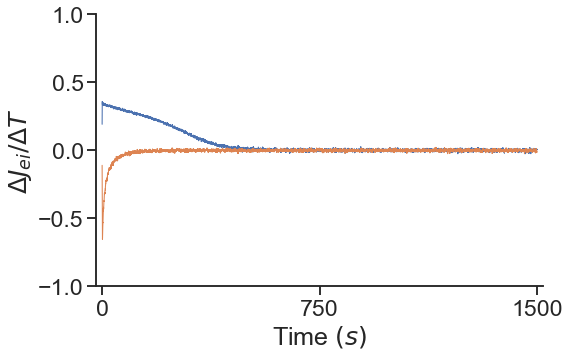

In [157]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

derivative = np.zeros_like(mean_Jei_recorded)
deltaT = 10 /1000 # sec
window_size = 100 # len(mean_Jei_recorded[0,:])
window_conv = np.ones((1,window_size)) / window_size
window_conv = window_conv.squeeze()
convolved_derivative = np.zeros((len(mean_Jei_recorded[:,0]),
                                 len(mean_Jei_recorded[0,:])))

for i in range(len(mean_Jei_recorded[:,0])): # For each IC
    for j in range(len(mean_Jei_recorded[0,:])-1): # For each time step
        derivative[i,j] = (mean_Jei_recorded[i,j+1] - mean_Jei_recorded[i,j])/deltaT
    derivative[i,:] = np.convolve(derivative[i,:],window_conv,mode='same')

# for i in range(len(mean_Jei_recorded[:,0])):
#     plt.plot(time_axis,derivative[i,:],linewidth=1.5)

i=0
plt.plot(time_axis,derivative[i,:],linewidth=1.05)
i=34
plt.plot(time_axis,derivative[i,:],linewidth=1.05)

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'$\Delta J_{ei}/\Delta T$')

# plt.yticks((-250,-150,-50))
plt.xticks((0,T/1000/2,T/1000))

plt.xlim((-20,T/1000+20))
plt.ylim((-1,1))

# plt.xlim((1000,2000))
# plt.ylim((-180,-50))

sns.despine()
plt.show()

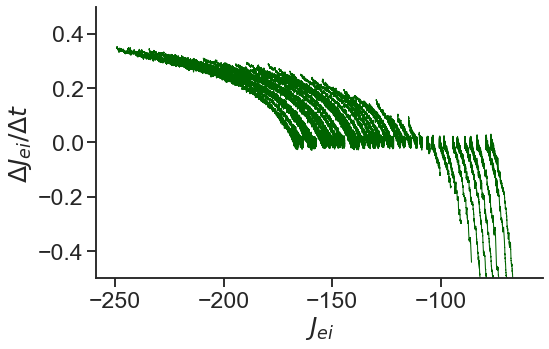

In [121]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

for i in range(len(mean_Jei_recorded[:,0])):
    plt.plot(mean_Jei_recorded[i,200:],derivative[i,200:],linewidth=1.05,color='darkgreen')

# i=5
# plt.plot(mean_Jei_recorded[i,:],derivative[i,:],linewidth=0.05)
# i=35
# plt.plot(mean_Jei_recorded[i,:],derivative[i,:],linewidth=0.05)

plt.xlabel(r'$J_{ei}$')
plt.ylabel(r'$\Delta J_{ei}/\Delta t$')

# plt.yticks((-250,-150,-50))
# plt.xticks((0,T/1000/2,T/1000))

# plt.xlim((-20,T/1000+20))
plt.ylim((-1/2,1/2))

# plt.xlim((1000,2000))
# plt.ylim((-180,-50))

sns.despine()
plt.show()

In [9]:
# R_e_theory = R_e_theory + Wx[0,0] * rx * np.sqrt(N) 
# R_i_theory = R_i_theory + Wx[1,0] * rx * np.sqrt(N) 

In [14]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

jei = symbols('jei')
pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix=0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jee = 25; jie = 112.5; jii = -250;
taux = 10; taue = 8; taui = 4; tauc = 5; rx = 10/1000; tauSTDP = 200; alpha=4;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = Matrix(([wee, wei], [wie, wii]))
Wx = np.array([wex, wix]).reshape((2,1))

Diff_E = R_e_sims - R_e_theory
Diff_I = R_i_sims - R_i_theory
soln = np.zeros((len(Jm_ei_iSTDP_vector),1))

for i in range(len(Jm_ei_iSTDP_vector)):
    Correction = np.array(([Diff_E[i,0]/np.sqrt(N), Diff_I[i,0]/np.sqrt(N)])).reshape((2,1))
    r = -W.inv() @ (Wx * rx + Correction)
    eq1 = Eq( (2*tauSTDP*r[0,0] - alpha) )
    soln[i,0] = solve(eq1,jei)[0]



/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/sympy/core/relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


No handles with labels found to put in legend.


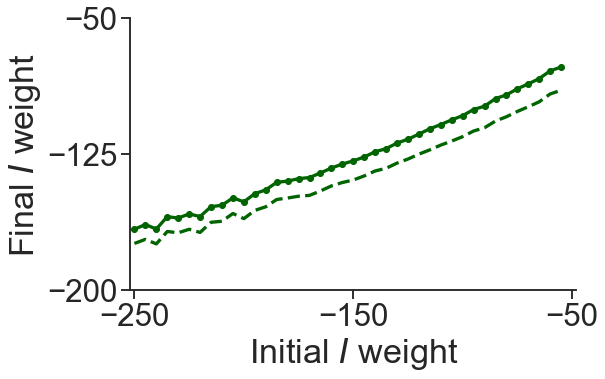

In [15]:
## PLot theoretical and empirical fixed points for a set of different initial conditions 
# on the same network with Vogels I->E rule.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(Jm_ei_iSTDP_vector, soln,  color='darkgreen',
        linestyle='--')
plt.plot(Jm_ei_iSTDP_vector,np.mean(mean_Jei_recorded[:,len(mean_Jei_recorded[0,:])//2:-1],axis=1),color='darkgreen', 
         markersize=6, marker='o')

plt.xlabel(r'Initial $I$ weight')
plt.ylabel(r'Final $I$ weight')

plt.xticks((-250,-150,-50))
plt.yticks((-200,-125,-50))
plt.xlim(-252,-48)
# plt.ylim(())

leg = plt.legend(loc='upper left',fontsize=25,frameon='none',markerscale=1)
leg.get_frame().set_linewidth(0.0)
# Change linewidth of legends.
#for legobj in leg.legendHandles:
#    legobj.set_linewidth(4.0)

sns.despine()

# plt.savefig('/Users/alan/Desktop/Research/NewPaper/Figure3/JeiFPvsJeiIC.pdf',bbox_inches="tight",format="pdf")

plt.show()

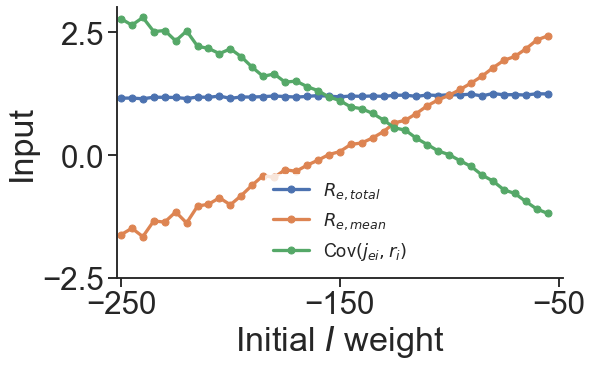

In [16]:
## Same as above but the difference between the two.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(Jm_ei_iSTDP_vector,R_e_sims + R_i_sims,
         label="$R_{e,total}$", marker='o',markersize=7)

plt.plot(Jm_ei_iSTDP_vector,R_e_theory+R_i_theory,
         label="$R_{e,mean}$",marker='o',markersize=7)

plt.plot(Jm_ei_iSTDP_vector,R_e_sims+R_i_sims
         - R_e_theory - R_i_theory,
         label="Cov$(j_{ei},r_i)$",marker='o',markersize=7)

plt.xlabel('Initial $I$ weight')
plt.ylabel('Input')

plt.xticks((-250,-150,-50))
plt.yticks((-2.5,0,2.5))
plt.xlim(-252,-48)

leg = plt.legend(loc='lower center',fontsize=18,frameon='none',markerscale=1)
leg.get_frame().set_linewidth(0.0)

sns.despine()


# plt.savefig('/Users/alan/Desktop/Research/NewPaper/Figure3/RvsJei.pdf',bbox_inches="tight",format="pdf")

plt.show()

ValueError: x and y must have same first dimension, but have shapes (200000,) and (400000,)

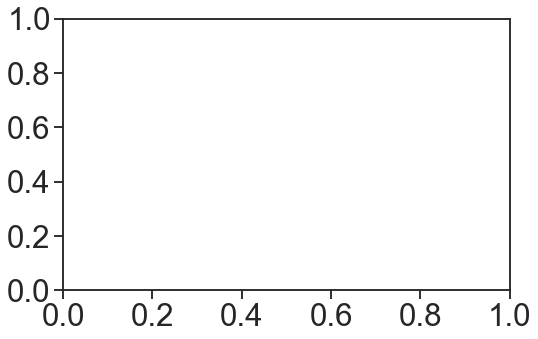

In [93]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":0.23})

# for i in range(len(Ie_current[:,0])-5):
#     plt.plot(time_axis,Ie_current[i,:],color='blue')
#     plt.plot(time_axis,Ii_current[i,:],color='red')
#     plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')
    
i=1
plt.plot(time_axis,Ie_current[i,:],color='blue')
plt.plot(time_axis,Ii_current[i,:],color='red')
plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Currents')

sns.despine()
plt.show()


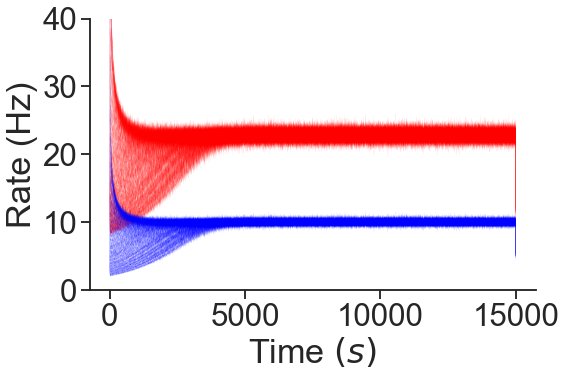

In [17]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.03})

# for i in range(len(Ie_current[:,0])-8):
#     plt.plot(1000*eRateT[i,:],color='blue')
#     plt.plot(1000*iRateT[i,:],color='red')
    
i=1
for i in range(len(Jm_ei_iSTDP_vector)):
    
    plt.plot(1000*eRateT[i,:],color='blue')
    plt.plot(1000*iRateT[i,:],color='red')
    
plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Rate (Hz)')

plt.ylim((0,40))

sns.despine()
plt.show()

# fig.savefig("./Cosyne20_figs/corr_heatmap.pdf", bbox_inches="tight")
